In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metric
from sklearn import svm
import math


In [52]:
# get_ipython().run_line_magic('matplotlib', 'inline')

In [53]:
pd_csv = pd.read_csv('/home/su/Desktop/DATA1.csv')
pd_csv

,X1,X2,Y
0,2.947814,6.626878,1
1,2.566991,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


In [54]:
#Read the columns from the dataset
X1 = pd_csv['X1']
X2 = pd_csv['X2']


In [55]:
#Divide the data in train and test
X_train = np.array(list(zip(X1,X2)))
Y_train = pd_csv['Y']
target_names=['-1','+1']

In [56]:
#Divide the dependent column in 2 seperate variables i.e + and -
plus_class = Y_train[Y_train<0].index
minus_class = Y_train[Y_train>0].index


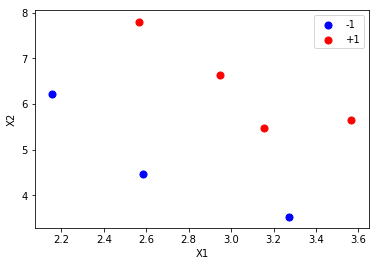

In [57]:
#Plot all the points in the data set in the coordinate systen
plt.scatter(X_train[plus_class,0],X_train[plus_class , 1],c='b',s=50)
plt.scatter(X_train[minus_class,0],X_train[minus_class , 1],c='r',s=50)
plt.legend(target_names)
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig('some_name.png')

In [58]:
#Fit the model in the Algtorithm
svm_fit = svm.SVC(kernel='linear').fit(X_train , Y_train)
svm_fit

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
#Get the parameters
svm_fit.get_params(True)

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [74]:
#Setting boundary of the plot
lb_x1 = math.floor(min(X_train[:,0]))-1
ub_x1 = math.ceil(max(X_train[:,0]))+1
lb_x2 = math.floor(min(X_train[:,1]))-1
ub_x2 = math.ceil(max(X_train[:,1]))+1
[lb_x1,ub_x1,lb_x2,ub_x2]

[1, 5, 2, 9]

In [77]:
plus_class = Y_train[Y_train<0].index
minus_class = Y_train[Y_train>0].index


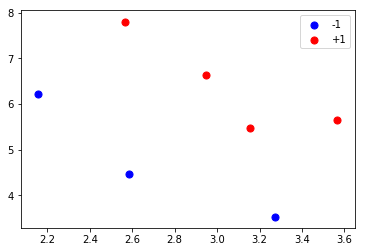

In [78]:
plt.scatter(X_train[plus_class,0],X_train[plus_class , 1],c='b',s=50)
plt.scatter(X_train[minus_class,0],X_train[minus_class , 1],c='r',s=50)
plt.legend(target_names)

Text(0.5, 1.0, 'Linearly Separable')

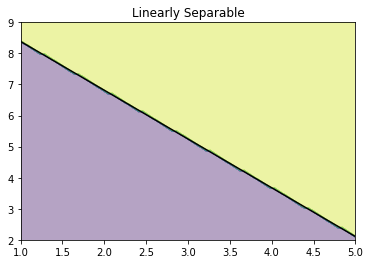

In [80]:
#Draw the seperable line
X,Y = np.mgrid[lb_x1:ub_x1:100j,lb_x2:ub_x2:100j]
Z = svm_fit.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Linearly Separable')

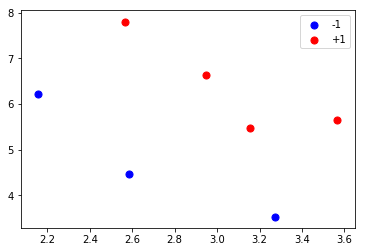

In [81]:
plus_class = Y_train[Y_train<0].index
minus_class = Y_train[Y_train>0].index
plt.scatter(X_train[plus_class,0],X_train[plus_class , 1],c='b',s=50)
plt.scatter(X_train[minus_class,0],X_train[minus_class , 1],c='r',s=50)
plt.legend(target_names)
X,Y = np.mgrid[lb_x1:ub_x1:100j,lb_x2:ub_x2:100j]
Z = svm_fit.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

Text(0.5, 1.0, 'Margin and Support Vectors')

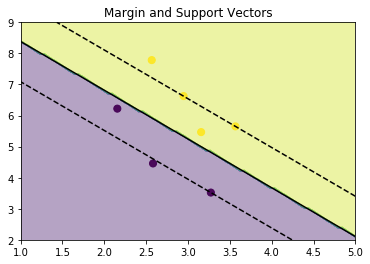

In [86]:
#The following plot show the margin and the support vectors
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svm_fit.support_vectors_[:,0],svm_fit.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,s=50,alpha=0.95);
plt.title('Margin and Support Vectors')

In [87]:
#The number of support vectors for each class can be revealed using `nsupport' attribute
svm_fit.n_support_

array([2, 2], dtype=int32)

In [88]:
#To get the indices (= the row numbers in the original dataset) of the support vectors, use support_ attribute
svm_fit.support_ 

array([5, 6, 2, 3], dtype=int32)

In [90]:
#Get the support vectors
svm_fit.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.566991, 5.651046],
       [3.156983, 5.467077]])

In [92]:
#For linear model, we can reveal the discriminant line that separate the classes using coef_ and intercept_ attributes.
weight=svm_fit.coef_
intercept=svm_fit.intercept_
a = -weight[0,0] / weight[0,1]
print('x2=',a,' * x1 + ',-intercept[0]/weight[0,1])

x2= -1.5697438232920253  * x1 +  9.954709623187776


In [95]:
#To get the normalize accuracy, of the training, we can use score(X,y) function.

svm_fit.score(X_train, Y_train)

1.0

In [96]:
y_pred=svm_fit.predict(X_train)
y_pred

array([ 1,  1,  1,  1, -1, -1, -1])

In [99]:
y_true = Y_train
metric.accuracy_score(y_true, y_pred, normalize=False)


7

In [100]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_true, y_pred))
# print(classification_report(y_true, y_pred))

[[3 0]
 [0 4]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [101]:
svm_fit.predict([[3,6]])


array([1])